4\. Um corpo de massa 1 kg move-se num oscilador quártico forçado. Se a posição de equilíbrio for a origem do eixo $x_{eq}$ = 0 m, o oscilador quártico tem a energia potencial

$$
E_p(x) = \frac{1}{2}kx^2(1+\alpha x^2)
$$

e exerce no corpo a força

$$
F_x(x) = -kx(1+2\alpha x^2)
$$

O oscilador é amortecido pela força $-bv_x$ e sujeito à força externa $F_0cos(\omega_ft)$.

Considere $k$ = 1 N/m, $b$= 0.05 kg/s, $\alpha$ = 0.002 N/m2, $F_0$ = 7.5 N e $\omega_f$ = 1.0 rad/s.


In [170]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [171]:
# Variables
k = 1
m = 1
b = 0.05
alpha = 0.002
f_0 = 7.5
omega_f = 1

In [172]:
# Time
time_start, time_end = 0, 500
dt = 0.01
n = int((time_end - time_start) / dt)

In [173]:
# Functions


def potential_energy(r):
    return 0.5 * k * r**2 * (1 + alpha * r**2)


def force(r):
    return -k * r * (1 + 2 * alpha * r**2)


def external_force(t):
    return f_0 * np.cos(omega_f * t)


def softening_force(r, v):
    return -b * v


def acceleration(r, v, t):
    return (external_force(t) + softening_force(r, v) + force(r)) / m


# Non formula functions


def is_local_maximum(array, index):
    return array[index - 1] < array[index] > array[index + 1]


def get_all_local_maxima(array):
    maxima = [i for i in range(1, len(array) - 1) if is_local_maximum(array, i)]
    return maxima


def get_period_from_array(r):
    maxima = get_all_local_maxima(r)
    return (maxima[-1] - maxima[-2]) * dt

a) Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 3 m.
Tem confiança no seu resultado?


In [174]:
# Initial conditions
r0 = 3
v0 = 0
a0 = acceleration(r0, v0, time_start)

In [175]:
# Arrays
a = np.zeros(n)
v = np.zeros(n)
r = np.zeros(n)
t = np.zeros(n)

a[0] = a0
v[0] = v0
r[0] = r0
t[0] = time_start

In [176]:
# Euler-Cromer method
for i in range(1, n):
    a[i] = acceleration(r[i - 1], v[i - 1], t[i - 1])
    v[i] = v[i - 1] + a[i - 1] * dt
    r[i] = r[i - 1] + v[i] * dt
    t[i] = t[i - 1] + dt

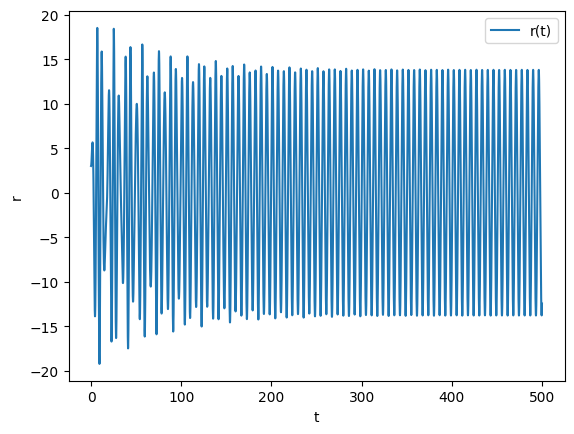

In [177]:
# Graph Position

plt.plot(t, r, label="r(t)")
plt.xlabel("t")
plt.ylabel("r")
plt.legend()
plt.show()

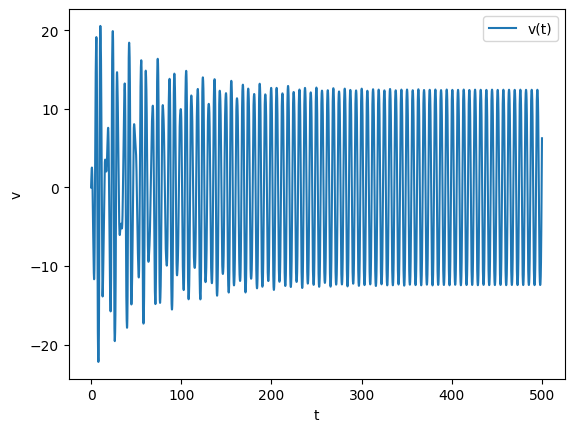

In [178]:
# Graph Velocity

plt.plot(t, v, label="v(t)")
plt.xlabel("t")
plt.ylabel("v")
plt.legend()
plt.show()

b) Calcule a amplitude do movimento e o seu período no regime estacionário, usando os resultados numéricos.


In [179]:
amplitude_idx = get_all_local_maxima(r)[-1]
amplitude = r[amplitude_idx]
print("Amplitude: ", amplitude, "m")

Amplitude:  13.795688416475034 m


In [180]:
period = get_period_from_array(r)
print("Period: ", period, "s")

Period:  6.28 s


c) Calcule os coeficientes de Fourier da oscilação no regime estacionário.


In [181]:
def get_fourier_coefficients(t_array, r_array, t_start_idx, t_end_idx, fourier_idx):
    period = t_array[t_end_idx] - t_array[t_start_idx]
    omega = 2 * np.pi / period

    # Calculation of the integral for a_n
    s1 = r_array[t_start_idx] * np.cos(fourier_idx * omega * t_array[t_start_idx])
    s2 = r_array[t_end_idx] * np.cos(fourier_idx * omega * t_array[t_end_idx])
    st = r_array[t_start_idx + 1 : t_end_idx] * np.cos(
        fourier_idx * omega * t_array[t_start_idx + 1 : t_end_idx]
    )
    sum_st = np.sum(st)
    integral_s = ((s1 + s2) / 2 + sum_st) * dt
    a_n = (2 / period) * integral_s

    # Calculation of the integral for b_n
    q1 = r_array[t_start_idx] * np.sin(fourier_idx * omega * t_array[t_start_idx])
    q2 = r_array[t_end_idx] * np.sin(fourier_idx * omega * t_array[t_end_idx])
    qt = r_array[t_start_idx + 1 : t_end_idx] * np.sin(
        fourier_idx * omega * t_array[t_start_idx + 1 : t_end_idx]
    )
    sum_qt = np.sum(qt)
    integral_q = ((q1 + q2) / 2 + sum_qt) * dt
    b_n = 2 / period * integral_q

    return a_n, b_n

In [182]:
a, b = get_fourier_coefficients(t, r, int(n / 2), n - 1, 1)

print("an: ", a)
print("bn: ", b)

an:  0.062369056776615577
bn:  -0.0028996709562025755
